In [1]:
import numpy as np
import pandas as pd

In [23]:
data = pd.read_csv('/content/drive/MyDrive/training/used_cars_data.csv')

In [14]:
sample_data = data.sample(n=10)

In [15]:
sample_data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1501,1501,Toyota Fortuner 4x2 AT,Delhi,2013,123000,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,NaN,16.50
5951,5951,Honda City 1.5 V MT,Pune,2014,48094,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,7.25
4168,4168,Mahindra Scorpio SLE BSIV,Delhi,2011,85000,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,8.0,NaN,5.25
5787,5787,Toyota Innova 2.5 VX (Diesel) 7 Seater,Mumbai,2015,45000,Diesel,Manual,First,12.99 kmpl,2494 CC,100.6 bhp,7.0,NaN,13.25
6555,6555,Hyundai i10 Magna 1.2,Coimbatore,2011,45086,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,NaN
3525,3525,Honda Amaze S i-Dtech,Delhi,2014,66000,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,3.50
7162,7162,Renault Pulse RxL,Kolkata,2012,52612,Diesel,Manual,First,23.08 kmpl,1461 CC,63.12 bhp,5.0,NaN,NaN
6682,6682,Maruti Ciaz ZDi Plus SHVS,Kochi,2017,48045,Diesel,Manual,First,28.09 kmpl,1248 CC,88.5 bhp,5.0,NaN,NaN
7178,7178,Honda Amaze VX i-DTEC,Hyderabad,2013,81304,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,NaN,NaN
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.00


In [24]:
data['Location'], _ = pd.factorize(data['Location'])

In [25]:
data.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,2,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [31]:
data = data.drop(['Name','Fuel_Type','Owner_Type','Mileage','Engine','Power','New_Price'],axis=1)

In [32]:
data['Transmission'] = data['Transmission'].replace({'Manual': 0, 'Automatic': 1})

In [33]:
data.head(10)

,S.No.,Location,Year,Kilometers_Driven,Transmission,Seats,Price
0,0,0,2010,72000,0,5.0,1.75
1,1,1,2015,41000,0,5.0,12.50
2,2,2,2011,46000,0,5.0,4.50
3,3,2,2012,87000,0,7.0,6.00
4,4,3,2013,40670,1,5.0,17.74
5,5,4,2012,75000,0,5.0,2.35
6,6,5,2013,86999,0,5.0,3.50
7,7,0,2016,36000,1,8.0,17.50
8,8,1,2013,64430,0,5.0,5.20
9,9,2,2012,65932,0,5.0,1.95


In [35]:
data.drop(['S.No.'],axis=1,inplace=True)

In [39]:
data.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Transmission            0
Seats                  53
Price                1234
dtype: int64

In [40]:
data.count()

Location             7253
Year                 7253
Kilometers_Driven    7253
Transmission         7253
Seats                7200
Price                6019
dtype: int64

In [43]:
data = data.dropna(axis=0)
# Denemelik olduğu için verileri bu kadar kolay atıyorum.
# Günlük hayatta bu böyle olmamalı!!!

In [44]:
data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Transmission         0
Seats                0
Price                0
dtype: int64

In [45]:
data.dtypes

Location               int64
Year                   int64
Kilometers_Driven      int64
Transmission           int64
Seats                float64
Price                float64
dtype: object

In [47]:
data.corr()
# 1-> Tam doğrusal kuvvetli bir ilişki söz konusu
# 0-> Herhangi bir bağımlılık yok
# -1-> Ters oranda bir ilişki mevcut

,Location,Year,Kilometers_Driven,Transmission,Seats,Price
Location,1.000000,0.052892,-0.028910,-0.030153,-0.000379,0.021167
Year,0.052892,1.000000,-0.172639,0.095781,0.012333,0.305772
Kilometers_Driven,-0.028910,-0.172639,1.000000,-0.025927,0.083113,-0.011276
Transmission,-0.030153,0.095781,-0.025927,1.000000,-0.075475,0.585981
Seats,-0.000379,0.012333,0.083113,-0.075475,1.000000,0.052225
Price,0.021167,0.305772,-0.011276,0.585981,0.052225,1.000000


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

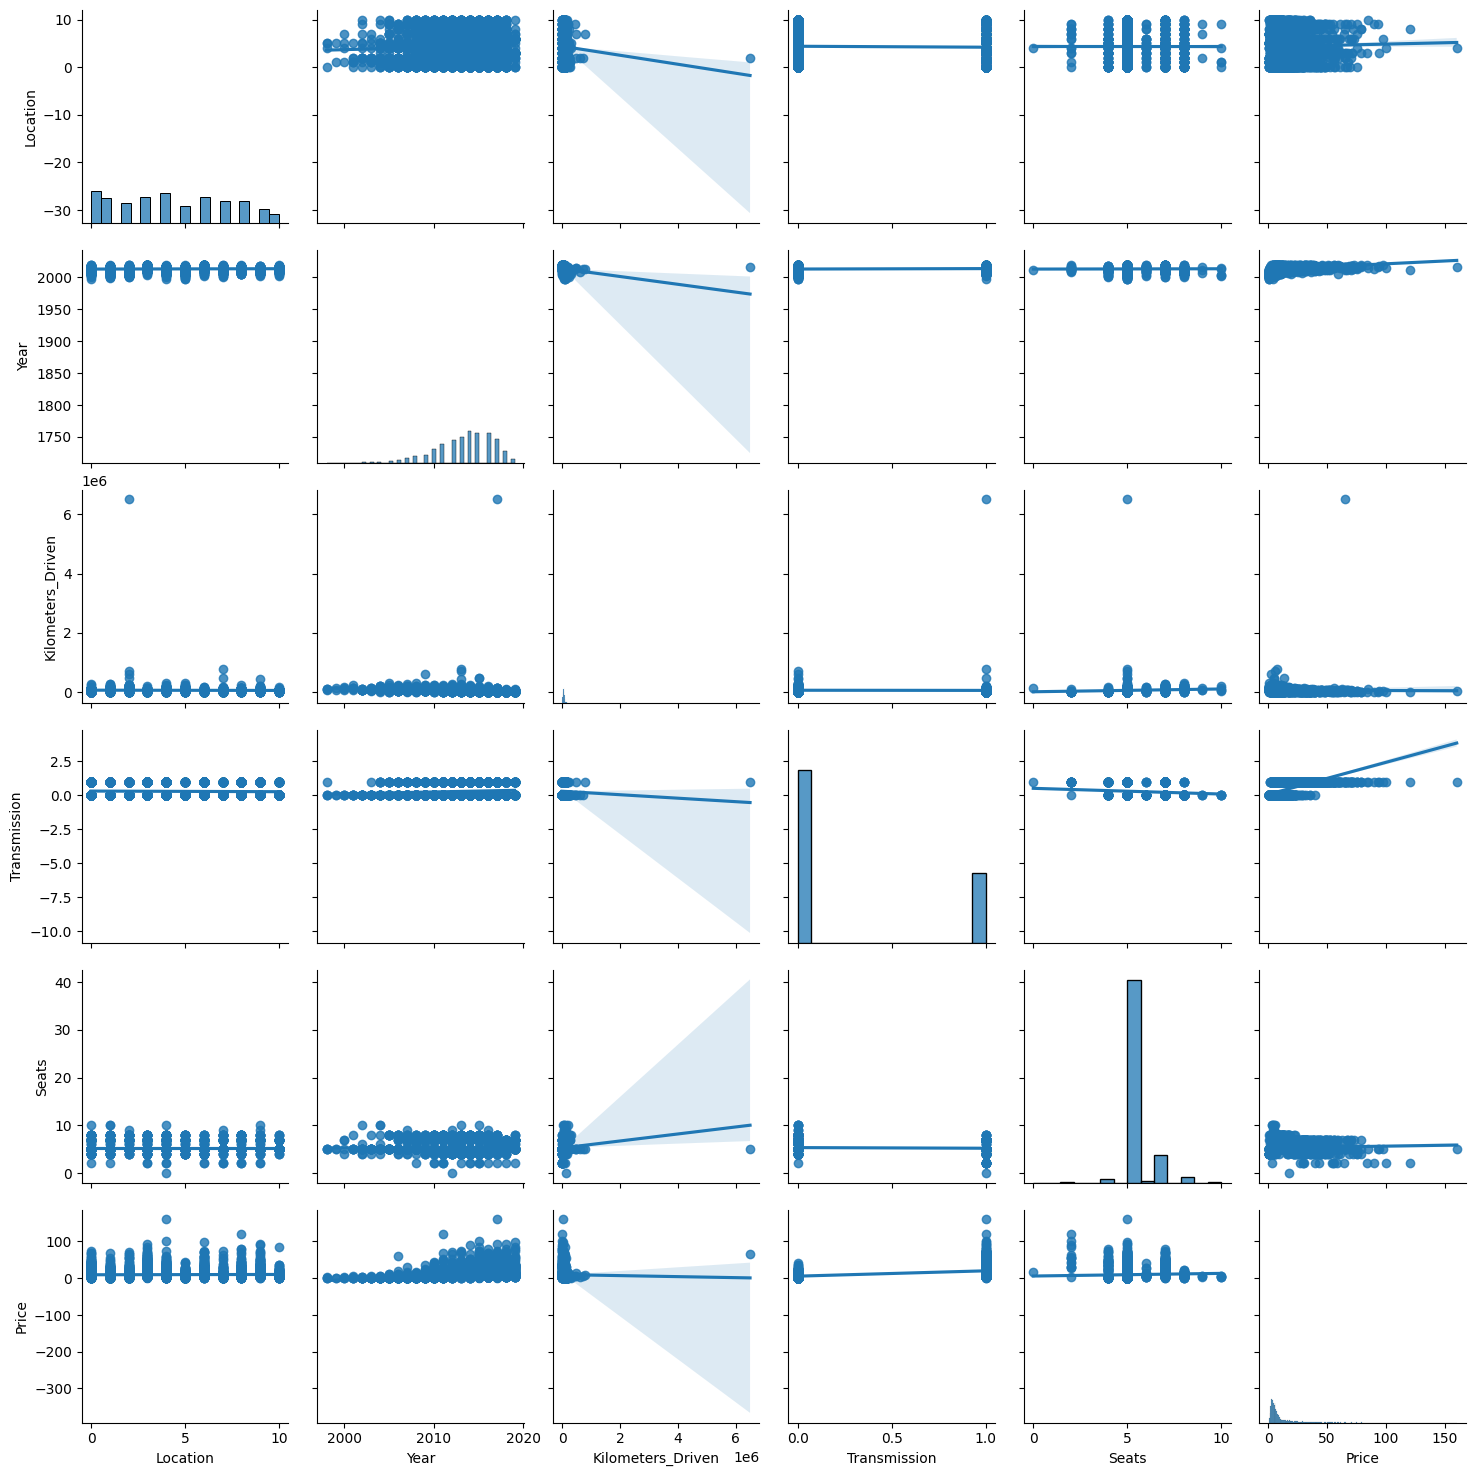

In [49]:
sns.pairplot(data,kind="reg")

<Axes: ylabel='Year'>

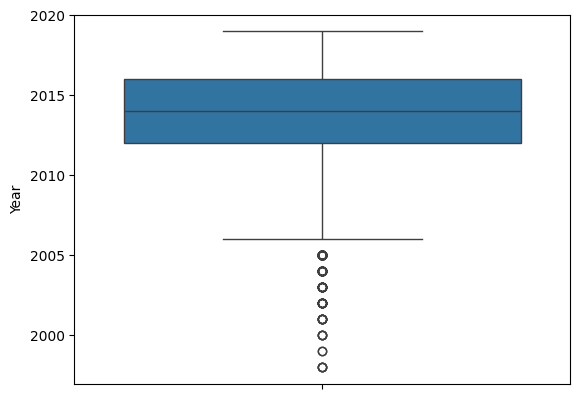

In [57]:
sns.boxplot(data['Year'])

In [58]:
Q1= data['Year'].quantile(0.25)
Q3= data['Year'].quantile(0.75)
IQR = Q3-Q1
maxLimit = Q3+1.5*IQR
outLiar = data['Year']>maxLimit
data.loc[outLiar,"Year"] = maxLimit
# Uçları baskılmam işlemi yaptık ve uç değerleri dengeledik!

In [60]:
import statsmodels.api as sm

In [61]:
y = data["Price"]

In [62]:
X = data[["Location","Year","Kilometers_Driven","Transmission","Seats"]]

In [64]:
const = sm.add_constant(X)
model = sm.OLS(y,const).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     854.0
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:23:39   Log-Likelihood:                -21310.
No. Observations:                5977   AIC:                         4.263e+04
Df Residuals:                    5971   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1778.7882     70.110    -25.371      0.000   -1916.230   -1641.347
Location              0.0976      0.037      2.630      0.009       0.025       0.170
Year                  0.8826      0.035     25.338      0.000       0.814       0.951
Kilometers_Driven  5.023e-06   1.23e-06      4.075      0.000    2.61e-06    7.44e-06
Transmission         14.1280      0.247     57.213      0.000      13.644      14.612
Seats                 1.2286      0.138      8.915      0.000       0.958       1.499
==============================================================================
Omnibus:                     4620.894   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203895.907
Skew:                           3.300   Prob(JB):                         0.00
Kurtosis:                      30.842   Cond. No.                     6.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
lr=LinearRegression()

In [79]:
lr.fit(X_train,y_train)

LinearRegression()

In [80]:
lr.coef_

array([7.85645561e-02, 8.74096483e-01, 5.18629398e-06, 1.38076845e+01,
       1.23190783e+00])

In [81]:
guess = lr.predict(X_test)
guess

array([ 8.23431234,  6.7825757 ,  7.13143294, ...,  3.62841896,
       -0.09280183, 22.28700108])

In [82]:
df=pd.DataFrame({"Real":y_test,"Guess":guess})

<Axes: >

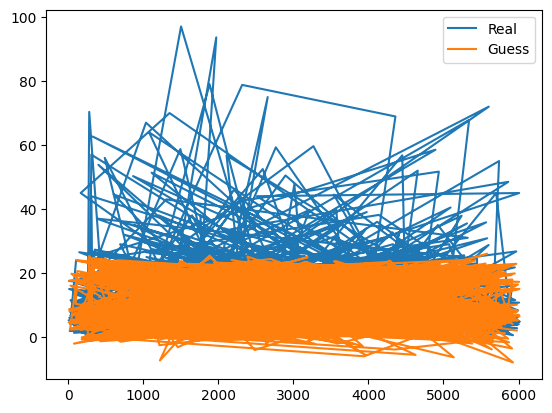

In [83]:
df.plot(kind="line")

In [84]:
# DataSet düzgün olmadığından böyle sonuç aldık ama
# Yapısal olarak nasıl bir yol izleneceğini ve altında yatan
# matematiksel analizi öğrenmiş olduk. Gerçek bir veri bu işlemler
# güzel sonuçlar verecektir.